In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


In [2]:
img = cv2.imread('resim.jpg', cv2.IMREAD_GRAYSCALE)

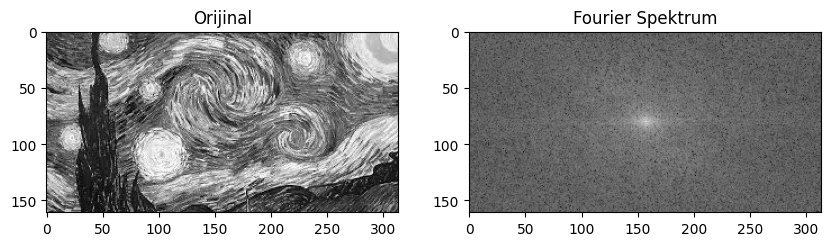

In [3]:
f = np.fft.fft2(img)
fshift = np.fft.fftshift(f)
magnitude_spectrum = 20 * np.log(np.abs(fshift) + 1)

plt.figure(figsize=(10,4))
plt.subplot(1,2,1), plt.imshow(img, cmap='gray'), plt.title('Orijinal')
plt.subplot(1,2,2), plt.imshow(magnitude_spectrum, cmap='gray'), plt.title('Fourier Spektrum')
plt.show()

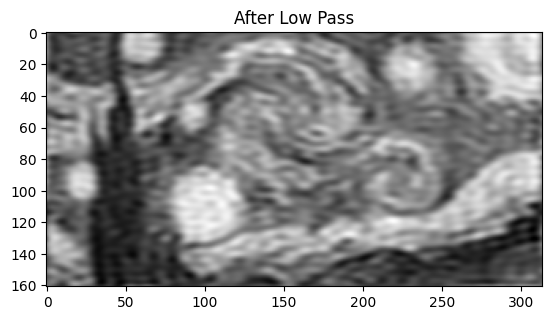

In [5]:
rows, cols = img.shape
crow, ccol = rows // 2 , cols // 2

mask = np.zeros((rows, cols), np.uint8)
cv2.circle(mask, (ccol, crow), 30, 1, thickness=-1)

fshift_filtered = fshift * mask
f_ishift = np.fft.ifftshift(fshift_filtered)
img_back = np.fft.ifft2(f_ishift)
img_back = np.abs(img_back)

plt.imshow(img_back, cmap='gray')
plt.title('After Low Pass')
plt.show()